In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Geração do dataset com dados aleatorios
np.random.seed(42)
n = 500
dias_da_semana = np.random.randint(0, 7, n)
feriado = np.random.choice([0, 1], size=n, p=[0.85, 0.15])
campanha_marketing = np.random.choice([0, 1], size=n, p=[0.7, 0.3])
preco_produto = np.round(np.random.normal(loc=50, scale=5, size=n), 2)
concorrencia_preco = np.round(preco_produto + np.random.normal(0, 3, n), 2)

def simular_vendas(preco, concorrente, feriado, marketing, dia):
    base = 200
    impacto = (-2.5 * (preco - 50) + 1.5 * (concorrente - 50))
    impacto += -40 if feriado else 0
    impacto += 60 if marketing else 0
    impacto += -10 if dia in [0, 1] else 10 if dia in [5, 6] else 0
    ruido = np.random.normal(0, 15)
    return max(0, base + impacto + ruido)

vendas = [
    simular_vendas(preco_produto[i], concorrencia_preco[i], feriado[i],
                   campanha_marketing[i], dias_da_semana[i])
    for i in range(n)
]

df = pd.DataFrame({
    'dia_da_semana': dias_da_semana,
    'feriado': feriado,
    'campanha_marketing': campanha_marketing,
    'preco_produto': preco_produto,
    'concorrencia_preco': concorrencia_preco,
    'vendas': np.round(vendas, 0).astype(int)
})

# Treinamento da IA
X = df.drop('vendas', axis=1)
y = df['vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline com normalização
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 13.13
RMSE: 246.09
R²: 0.85


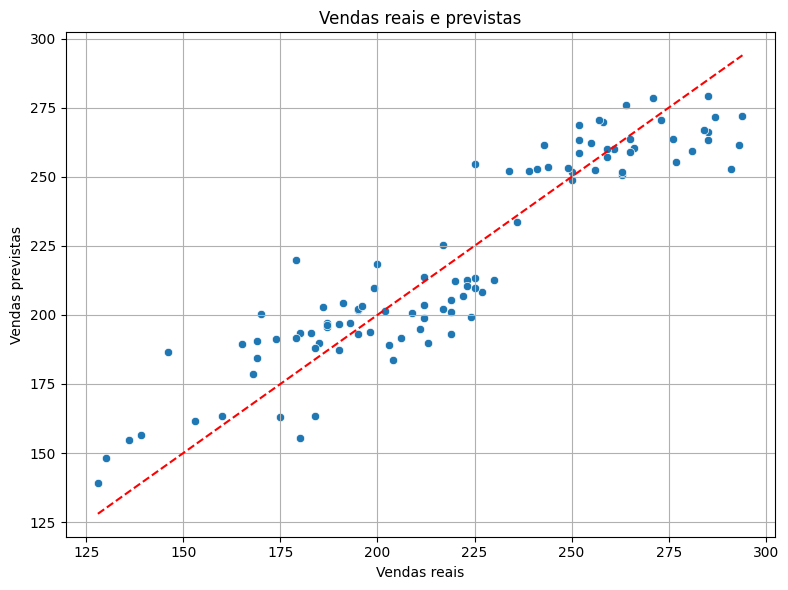

In [2]:
#Grafico com as vendas reais e previstas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Vendas reais')
plt.ylabel('Vendas previstas')
plt.title('Vendas reais e previstas')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()
